<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/Notebook_5_ae_tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/DSNN-5-ae-tb

## Autoencoders

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, -1) / 255.0
x_test = np.expand_dims(x_test, -1) / 255.0

img_shape = 28

11490434/11490434 [==============================] - 1s 0us/step


**Строим encoder**


In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(img_shape, img_shape, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2,
                  padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2,
                  padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
encoder_outputs = layers.Dense(latent_dim)(x)


encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 69,042
Trainable params: 69,042
Non-trainable

**Строим свой decoder**


In [ ]:
x = layers.Dense(16, activation="relu")(encoder_outputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

In [ ]:
autoencoder = keras.Model(encoder_inputs, decoder_outputs)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
 dense_2 (Dense)             (None, 16)                48    

In [ ]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='MSE')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
118/118 [==============================] - 20s 30ms/step - loss: 0.0901 - val_loss: 0.0659
Epoch 2/10
118/118 [==============================] - 3s 26ms/step - loss: 0.0607 - val_loss: 0.0575
Epoch 3/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0548 - val_loss: 0.0521
Epoch 4/10
118/118 [==============================] - 3s 24ms/step - loss: 0.0508 - val_loss: 0.0493
Epoch 5/10
118/118 [==============================] - 3s 28ms/step - loss: 0.0480 - val_loss: 0.0469
Epoch 6/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0463 - val_loss: 0.0457
Epoch 7/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0453 - val_loss: 0.0447
Epoch 8/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0444 - val_loss: 0.0438
Epoch 9/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0436 - val_loss: 0.0434
Epoch 10/10
118/118 [==============================] - 3s 26ms/step - loss: 0.0431 - val_l

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


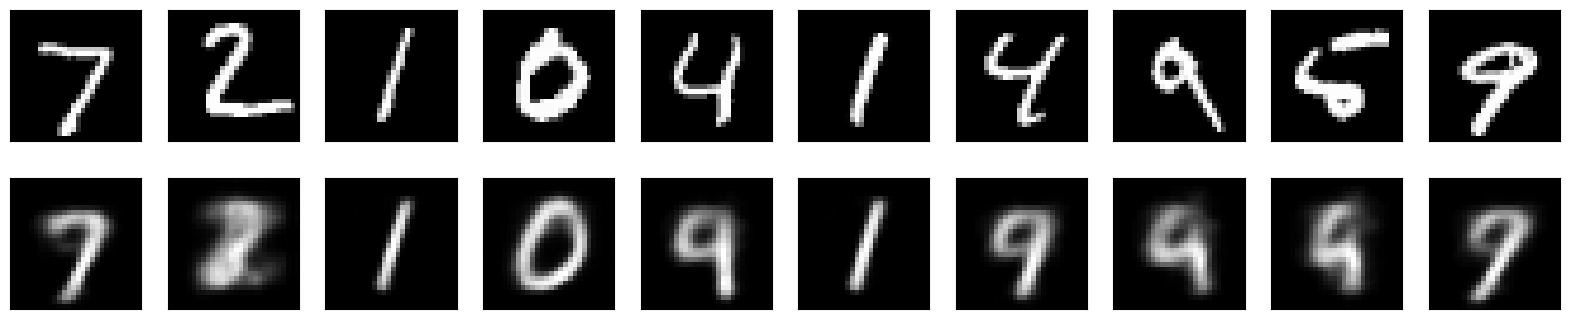

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
 dense_2 (Dense)             (None, 16)                48    

In [ ]:
encoder_input = autoencoder.get_layer('input_1').input
encoder_input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [ ]:
encoder_output = autoencoder.get_layer('dense_1').output
encoder_output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

In [ ]:
encoder = keras.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                50192     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 69,042
Trainable params: 69,042
Non-trainable

In [ ]:
input = autoencoder.get_layer('dense_2').input
output = autoencoder.get_layer('conv2d_transpose_2').output

In [ ]:
decoder = keras.Model(input, output)
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 16)                48        
                                                                 
 dense_3 (Dense)             (None, 3136)              53312     
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                 

In [ ]:
def plot_latent(encoder, x_test, y_test):
    plt.figure(figsize=(10, 8))
    z = encoder.predict(x_test)
    plt.scatter(z[:, 0], z[:, 1], c=y_test, cmap='tab10')
    plt.colorbar()

Наше скрытое представление отнесло изображения из одного класса в один кластер.

313/313 [==============================] - 1s 2ms/step


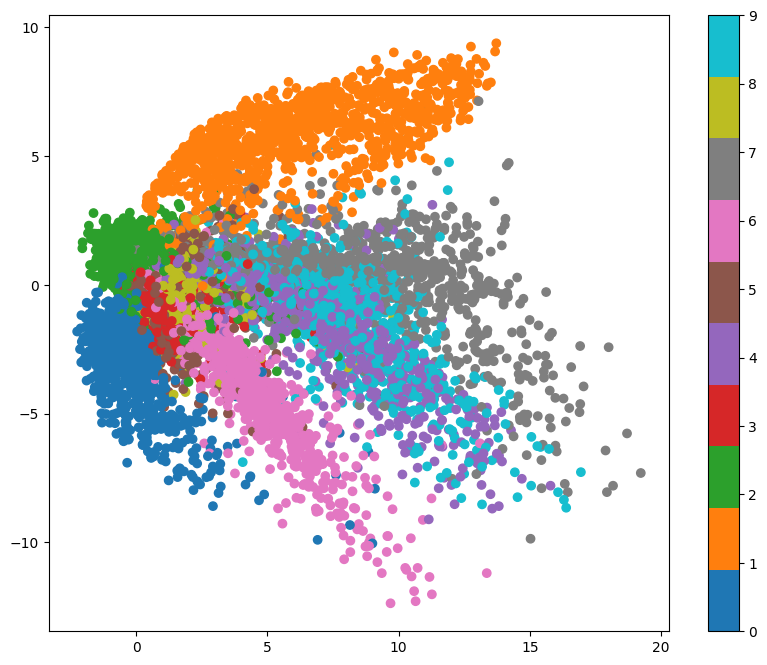

In [ ]:
plot_latent(encoder, x_test, y_test)

1/1 [==============================] - 0s 153ms/step


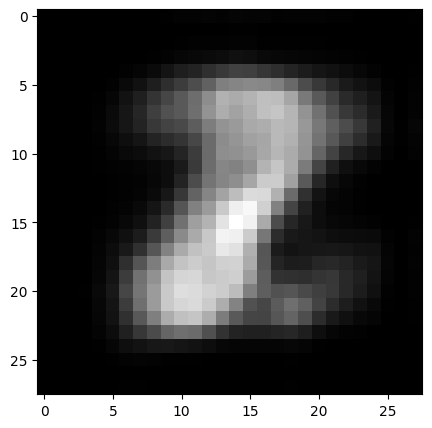

In [ ]:
def plot_digit_from_decoder(decoder, z, digit_size):
    """ display a 2D plot of the digit classes in the latent space """
    data = np.array([[z[0], z[1]]])
    digit = decoder.predict(data)
    digit = digit.reshape(digit_size, digit_size)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(digit)

    plt.show()


plot_digit_from_decoder(decoder, [1, 1], 28)

In [ ]:
def plot_reconstructed(decoder, r0=(-1, 1), r1=(-1, 1), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            data = np.array([[x, y]])
            x_hat = decoder.predict(data, verbose=0)
            x_hat = x_hat.reshape(28, 28)
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat

    plt.figure(figsize=(15, 6))
    plt.imshow(img, extent=[*r0, *r1])

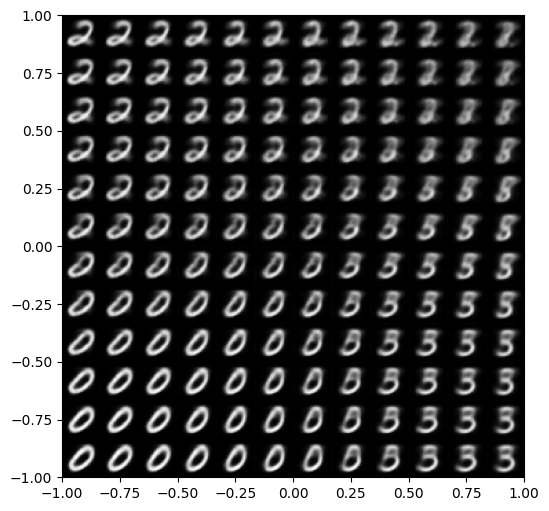

In [ ]:
plot_reconstructed(decoder)

# Инструкция по Tensorboard

TensorBoard позволяет логгировать процесс обучения в реальном времени с построением графиков и просмотром промежуточных результатов. Его можно интегрировать как в jupyter notebook на локальной машине, так и в Google Colab.

## Setup

Для запуска на локальной машине необходимо сначала установить TensorBoard:

```pip install tensorboard```

Затем его надо запустить:

```tensorboard --logdir YOUR_DIRECTORY_HERE```

При успешном запуске доступ к TensorBoard осуществляется через порт 6006 (это можно изменить, вызвав аргумент ```--port```).

Далее доступ осуществляется через браузер (```localhost:6006```).

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime, os

## TensorBoard в Google Colab

Потренируемся работать с TB на датасете [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist):

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


Для простоты создадим легковесную модель:

In [ ]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
def train_model():
    model = create_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

    model.fit(x_train, y_train, 
              epochs=20, 
              validation_data=(x_test, y_test), 
              callbacks=[tensorboard_callback])

#train_model()

Теперь мы можем в реальном времени (почти) следить за процессом обучения..

In [ ]:
%tensorboard --logdir logs

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
train_model()

Epoch 1/20
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5015 - accuracy: 0.8202 - val_loss: 0.4095 - val_accuracy: 0.8529
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3823 - accuracy: 0.8607 - val_loss: 0.3779 - val_accuracy: 0.8652
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3489 - accuracy: 0.8728 - val_loss: 0.3698 - val_accuracy: 0.8651
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8779 - val_loss: 0.3612 - val_accuracy: 0.8693
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8835 - val_loss: 0.3494 - val_accuracy: 0.8758
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8888 - val_loss: 0.3396 - val_accuracy: 0.8797
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2901 - accuracy: 0.8917 - val_loss: 0.3453 - val_accuracy

# Дополнительные материалы
1. Deep Learning на пальцах 8 - Metric Learning, Autoencoders, GANs - https://youtu.be/ajEQ10s8XRg
2. Variational AutoEncoder - https://keras.io/examples/generative/vae/
3. The GAN Zoo - https://github.com/hindupuravinash/the-gan-zoo
4. Свой Callback в Keras - https://youtu.be/sq9HvLAsK94
5. Свой Callback https://www.tensorflow.org/guide/keras/custom_callback
